# Generalized Linear Models
In this notebook we study *generalized linear model* and analyze how they can be implemented and tested, we will start with a generalization that is not present in the ``sklearn`` library and will be useful to us: linear model with quadratic features.

## Linear model with quadratic feature
Consider the $p$ features $x_1,\ldots,x_p$, we will expand the space to include also the features $x_1^2,\ldots,x_p^2$, thus the expansion doubles the number of features and introduces non-linear behavior. However this transformation differs from the usual ``PolynomialFeatures`` because it does not include *interaction* features (*e.g.*, feature like $x_1x_2$)

In [5]:
import numpy as np
def PolynomialTransformation(X, degree=2):
    return np.stack([np.concatenate([x**d for d in range(1,degree+1)]) for x in X])

Above function actually works for any degree $d$ and produces the feature expansion
\begin{align*}
(x_1,\ldots,x_p) \longrightarrow (x_1,\ldots,x_p,x_1^2,\ldots,x_p^2,\ldots,x_1^d,\ldots x_p^d)
\end{align*}
We test the model by generating sample points from a quadratic function $f(x) = ax^2 + bx + c$ and then esitmating it using both ordinary regression on the feature space $x$ and on the feature space $(x^2, x)$. Clearly we expecte the latter to perform better (in fact in the latter case the generator function is contained in the class model used for predictors).

In [34]:
def generate_quadratic(n_samples, noise=0):
    a,b,c = np.random.randn(3)*10
    x = np.random.randn(n_samples)*20
    y = a*(x**2) + b*x + c + noise*np.random.randn(n_samples)
    return x,y,a,b,c
    
x,y,a,b,c = generate_quadratic(40,noise=1000)

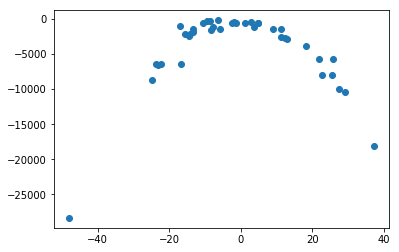

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

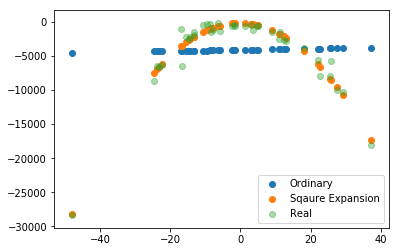

In [36]:
from sklearn.linear_model import LinearRegression
ordinary = LinearRegression()
ordinary.fit(x.reshape(-1,1),y)
xq = PolynomialTransformation(x.reshape(-1,1))
quad_expansion = LinearRegression()
quad_expansion.fit(xq,y)

plt.scatter(x,ordinary.predict(x.reshape(-1,1)), label="Ordinary")
plt.scatter(x,quad_expansion.predict(xq), label="Sqaure Expansion")
plt.scatter(x,y,label="Real", alpha=0.4)
plt.legend()

It is quite obvious that the square expansion worked out well and gave good results (in fact almost perfect result due to absence of noise in $y$).

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
pipeline = make_pipeline( FunctionTransformer(PolynomialTransformation),LinearRegression())

In [38]:
pipeline.fit(x.reshape(-1,1),y)

/usr/lib/python3/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/lib/python3/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function PolynomialTransformation at 0x7f306cffec80>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=None)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [39]:
pipeline.steps[-1][-1].coef_

array([ -5.65220582, -12.28232465])

In [40]:
quad_expansion.coef_

array([ -5.65220582, -12.28232465])

In [41]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, pipeline.predict(x.reshape(-1,1))))
print(mean_squared_error(y, ordinary.predict(x.reshape(-1,1))))

894000.0428035466
29061920.810804226


/usr/lib/python3/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
